Завдання 1:
   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414

Завдання 2:
              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5

Завдання 3:
Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

Завдання 5:
93889

Завдання 10:
Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418


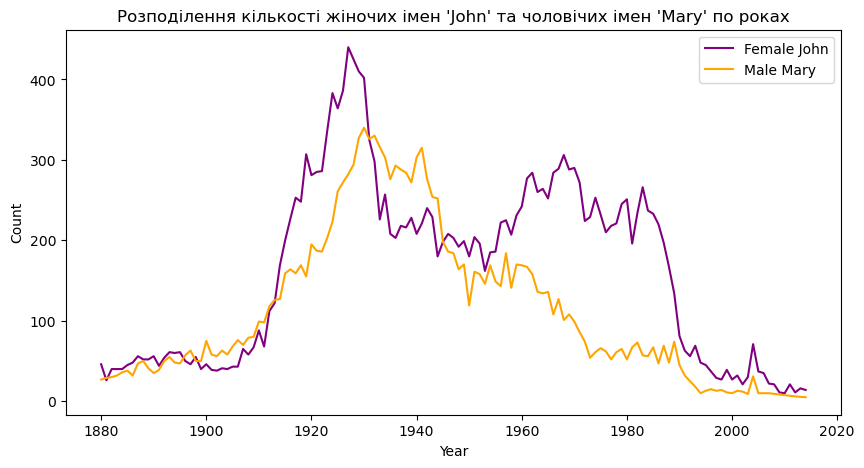

In [23]:
import pandas as pd

# Завантаження набору даних
data = pd.read_csv("NationalNames.csv")

# Завдання 1: Вивести перші 8 рядків набору даних
print("Завдання 1:")
print(data.head(8))

# Завдання 2: Вивести останні 8 рядків набору даних
print("\nЗавдання 2:")
print(data.tail(8))

# Завдання 3: Отримати імена стовпців набору даних
print("\nЗавдання 3:")
print(data.columns)

# Завдання 5: Знайти кількість унікальних імен у наборі даних
print("\nЗавдання 5:")
unique_names = data['Name'].nunique()
print(unique_names)

# Завдання 10: Підрахувати кількість унікальних імен у кожному році
print("\nЗавдання 10:")
unique_names_per_year = data.groupby('Year')['Name'].nunique()
print(unique_names_per_year)

# Завдання 11: Знайти рік із найбільшою кількістю унікальних імен
print("\nЗавдання 11:")
year_with_most_unique_names = unique_names_per_year.idxmax()
print(year_with_most_unique_names)

# Завдання 12: Знайти найпопулярніше ім'я в році з максимальною кількістю унікальних імен
print("\nЗавдання 12:")
most_popular_name_in_year = data[data['Year'] == year_with_most_unique_names].nlargest(1, 'Count')['Name'].values[0]
print(most_popular_name_in_year)

# Завдання 13: Знайти рік, коли ім'я "Jacob" було найпопулярнішим серед жіночих імен
print("\nЗавдання 13:")
jacob_female = data[(data['Name'] == 'Jacob') & (data['Gender'] == 'F')]
year_jacob_most_popular_female = jacob_female.loc[jacob_female['Count'].idxmax(), 'Year'] if not jacob_female.empty else "Ім'я Jacob не було серед жіночих"
print(year_jacob_most_popular_female)

# Завдання 14: Знайти рік із найбільшою кількістю гендерно нейтральних імен
print("\nЗавдання 14:")
gender_neutral = data.groupby(['Year', 'Name'])['Gender'].nunique()
gender_neutral = gender_neutral[gender_neutral == 2]
year_with_most_gender_neutral = gender_neutral.groupby('Year').size().idxmax()
print(year_with_most_gender_neutral)

# Завдання 15: Знайти загальну кількість народжень за рік
print("\nЗавдання 15:")
births_per_year = data.groupby('Year')['Count'].sum()
print(births_per_year)

# Завдання 16: Знайти рік, коли народилося найбільше дітей
print("\nЗавдання 16:")
year_with_most_births = births_per_year.idxmax()
print(year_with_most_births)

# Завдання 17: Підрахувати кількість дівчаток та хлопчиків, які народились кожного року
print("\nЗавдання 17:")
gender_counts_per_year = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()
print(gender_counts_per_year.head(5))

# Завдання 18: Підрахувати кількість років, коли дівчаток народжувалось більше, ніж хлопчиків
print("\nЗавдання 18:")
years_more_girls = (gender_counts_per_year['F'] > gender_counts_per_year['M']).sum()
print(years_more_girls)

# Завдання 21: Порахувати, скільки разів хлопчиків називали ім'ям "Barbara"
print("\nЗавдання 21:")
barbara_count = data[(data['Name'] == 'Barbara') & (data['Gender'] == 'M')]['Count'].sum()
print(barbara_count)

# Завдання 22: Порахувати, скільки років проводилось спостереження
print("\nЗавдання 22:")
observation_years = data['Year'].nunique()
print(observation_years)

# Завдання 23: Знайти найпопулярніші гендерно-нейтральні імена (присутні щороку)
print("\nЗавдання 23:")

# 1. Знайдемо імена, що зустрічаються в кожному році
names_per_year = data.groupby('Name')['Year'].nunique()  # Підрахуємо унікальні роки для кожного імені
names_every_year = names_per_year[names_per_year == data['Year'].nunique()].index  # Імена, які присутні в кожному році

# 2. Фільтруємо дані для цих імен
df_filtered = data[data['Name'].isin(names_every_year)]

# 3. Групуємо за ім'ям і перевіряємо на гендерну нейтральність
# Гендерно-нейтральне ім'я - це те, що присутнє і для хлопців, і для дівчат
gender_counts = df_filtered.groupby('Name')['Gender'].nunique()  # Рахуємо унікальні значення статі для кожного імені
gender_neutral_names = gender_counts[gender_counts == 2].index  # Вибираємо імена, що зустрічаються для обох статей

# 4. Фільтруємо дані, щоб залишити тільки гендерно-нейтральні імена
df_neutral = df_filtered[df_filtered['Name'].isin(gender_neutral_names)]

# 5. Підраховуємо загальну кількість для кожного гендерно-нейтрального імені
name_counts = df_neutral.groupby('Name')['Count'].sum()

# 6. Сортуємо за кількістю по спаданню та беремо перші 16
top_16_neutral_names = name_counts.sort_values(ascending=False).head(16)

# 7. Виводимо результат
print("Топ-16 найпопулярніших гендерно-нейтральних імен:")
print(top_16_neutral_names)

# Завдання 24: Знайти найпопулярніше серед непопулярних імен
print("\nЗавдання 24:")
# Визначення "непопулярних" імен як тих, які з'являються менше певної кількості разів (наприклад, 1000)
threshold = 1000
unpopular_names = data.groupby('Name')['Count'].sum()
unpopular_names = unpopular_names[unpopular_names < threshold]
most_popular_unpopular_name = unpopular_names.idxmax()
print(most_popular_unpopular_name)

# Завдання 26: Побудувати графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках
import matplotlib.pyplot as plt

print("\nЗавдання 26:")
john_female = data[(data['Name'] == 'John') & (data['Gender'] == 'F')].groupby('Year')['Count'].sum()
mary_male = data[(data['Name'] == 'Mary') & (data['Gender'] == 'M')].groupby('Year')['Count'].sum()

plt.figure(figsize=(10, 5))
plt.plot(john_female.index, john_female.values, label="Female John", color="purple")
plt.plot(mary_male.index, mary_male.values, label="Male Mary", color="orange")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Розподілення кількості жіночих імен 'John' та чоловічих імен 'Mary' по роках")
plt.legend()
plt.show()